Exp3 algorithms vs UCB on simple stochastic examples (e.g. Bernoulli MAB)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

from MultiArmedBandit import Arm, bernoulliArm, evolvingBernoulliArm
from Exp3 import exp3, exp3P, exp3_IX
from OtherBanditAlgorithms import UCB1, Random

Populating the interactive namespace from numpy and matplotlib


## 1st Experiment
Hard to differentiate between arms: best arm at 0.51, other ones at 0.5

In [14]:
MAB = [bernoulliArm(mean=0.5) for i in range(9)]
MAB.append(bernoulliArm(mean=0.51))

In [15]:
T = 5000

K = len(MAB)
eta_exp3 = np.sqrt(2 * np.log(K) / T * K)
gamma_exp3 = np.sqrt(K * log(K) / ((np.exp(1) - 1) * T))

delta = 0.05
eta_exp3P = 0.95 * np.sqrt(np.log(K) / (T * K))
gamma_exp3P = 1.05 * np.sqrt(np.log(K) * K / T)
beta = np.sqrt(np.log(K / delta) /  (T * K))

eta_exp3IX = np.sqrt(2 * np.log(K) / T * K)

In [16]:
#best arm cumulative reward
best_cumsum = [0.51 * t for t in range(1, T+1)]

In [17]:
nb_iter = 20
Weights = np.zeros((3, T, K))
Rewards = np.zeros((nb_iter, 4, T))
Prob = np.zeros((3, T, K))

draws_UCB = np.zeros(T)

for i in range(nb_iter):
    #run 4 algorithms
    rew, weights_exp, proba_hist_exp3 = exp3(MAB, T, eta_exp3, gamma=gamma_exp3)
    rew_P, weights_expP, proba_hist_expP = exp3P(MAB, T, beta=beta, gamma=gamma_exp3P, eta=eta_exp3P)
    rew_IX, weights_expIX, proba_hist_expIX = exp3_IX(MAB, T, eta_exp3IX, gamma=eta_exp3IX / 2)
    rew_UCB = UCB1(MAB, T, rho=0.2)
    #calculate cumulated reward
    rewUCB_cumsum = np.cumsum(rew_UCB)
    rew_cumsum = np.cumsum(rew)
    rewP_cumsum = np.cumsum(rew_P)
    rewIX_cumsum = np.cumsum(rew_IX)
    #save cumulated rewards, weights and probability distribution
    Rewards[i] = [rew_cumsum, rewP_cumsum, rewIX_cumsum, rewUCB_cumsum]
    Weights += [weights_exp, weights_expP, weights_expIX]
    Prob += [proba_hist_exp3, proba_hist_expP, proba_hist_expIX]
    
# calculate statistics
Rewards_cum = np.mean(Rewards, axis=0)
Rewards_std = np.std(Rewards, axis=0)
Weights /= nb_iter
Prob /= nb_iter

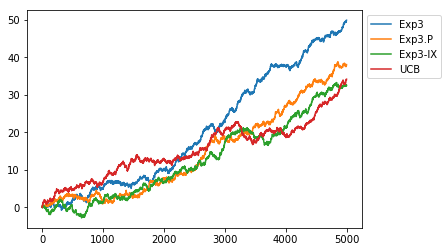

In [19]:
#cumulated rewards with std plot
T1 = 0
T2 = 5000
plt.errorbar(np.arange(T2 - T1), (best_cumsum - Rewards_cum[0])[T1:T2], label="Exp3")
plt.errorbar(np.arange(T2 - T1), (best_cumsum - Rewards_cum[1])[T1:T2], label="Exp3.P")
plt.errorbar(np.arange(T2 - T1), (best_cumsum - Rewards_cum[2])[T1:T2], label="Exp3-IX")
plt.errorbar(np.arange(T2 - T1), (best_cumsum - Rewards_cum[3])[T1:T2], label="UCB")

delta = 0.05
#0.95 bound for Exp3-IX and Exp3.P
if False:
    plt.plot([2 * np.sqrt(K * t * np.log(K)) + (np.sqrt(2 * K * t / (log(K))) + 1) * log(2 / delta) for t in range(1, T + 1)], label="0.95 Exp3-IX probability bound")
    plt.plot([5.15 * np.sqrt(t * K * np.log(K / delta)) for t in range(T)], label="Exp3.P 0.95 probability bound")
plt.legend(loc="upper left", bbox_to_anchor=(1., 1.))


In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)

plt.plot(Prob[0])
plt.legend([i + 1 for i in range(10)], loc="center left")
plt.title("Exp3")

plt.subplot(1, 3, 2)

plt.plot(Prob[1])
plt.legend([i + 1 for i in range(10)], loc="center left")
plt.title("Exp3.P")

plt.subplot(1, 3, 3)
plt.plot(Prob[2])
plt.title("Exp3-IX")
plt.legend([i + 1 for i in range(10)], loc="center left")


## Second experiment
A bit easier: 9 arms with mean 0.5, 1 with 0.6

In [20]:
MAB = [bernoulliArm(mean=0.5) for i in range(9)]
MAB.append(bernoulliArm(mean=0.6))

In [21]:
T = 5000

K = len(MAB)
eta_exp3 = np.sqrt(2 * np.log(K) / T * K)
gamma_exp3 = np.sqrt(K * log(K) / ((np.exp(1) - 1) * T))

delta = 0.05
eta_exp3P = 0.95 * np.sqrt(np.log(K) / (T * K))
gamma_exp3P = 1.05 * np.sqrt(np.log(K) * K / T)
beta = np.sqrt(np.log(K / delta) /  (T * K))

eta_exp3IX = np.sqrt(2 * np.log(K) / T * K)

In [22]:
#best arm cumulative reward
best_cumsum = [0.6 * t for t in range(1, T+1)]

In [23]:
nb_iter = 20
Weights = np.zeros((3, T, K))
Rewards = np.zeros((nb_iter, 4, T))
Prob = np.zeros((3, T, K))

draws_UCB = np.zeros(T)

for i in range(nb_iter):
    #run 4 algorithms
    rew, weights_exp, proba_hist_exp3 = exp3(MAB, T, eta_exp3, gamma=gamma_exp3)
    rew_P, weights_expP, proba_hist_expP = exp3P(MAB, T, beta=beta, gamma=gamma_exp3P, eta=eta_exp3P)
    rew_IX, weights_expIX, proba_hist_expIX = exp3_IX(MAB, T, eta_exp3IX, gamma=eta_exp3IX / 2)
    rew_UCB = UCB1(MAB, T, rho=0.2)
    #calculate cumulated reward
    rewUCB_cumsum = np.cumsum(rew_UCB)
    rew_cumsum = np.cumsum(rew)
    rewP_cumsum = np.cumsum(rew_P)
    rewIX_cumsum = np.cumsum(rew_IX)
    #save cumulated rewards, weights and probability distribution
    Rewards[i] = [rew_cumsum, rewP_cumsum, rewIX_cumsum, rewUCB_cumsum]
    Weights += [weights_exp, weights_expP, weights_expIX]
    Prob += [proba_hist_exp3, proba_hist_expP, proba_hist_expIX]
    
# calculate statistics
Rewards_cum = np.mean(Rewards, axis=0)
Rewards_std = np.std(Rewards, axis=0)
Weights /= nb_iter
Prob /= nb_iter

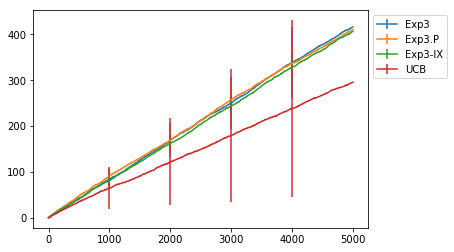

In [24]:
#cumulated rewards with std plot
T1 = 0
T2 = 5000
plt.errorbar(np.arange(T2 - T1), (best_cumsum - Rewards_cum[0])[T1:T2], Rewards_std[0], errorevery=1000, label="Exp3")
plt.errorbar(np.arange(T2 - T1), (best_cumsum - Rewards_cum[1])[T1:T2], Rewards_std[1], errorevery=1000, label="Exp3.P")
plt.errorbar(np.arange(T2 - T1), (best_cumsum - Rewards_cum[2])[T1:T2], Rewards_std[2], errorevery=1000, label="Exp3-IX")
plt.errorbar(np.arange(T2 - T1), (best_cumsum - Rewards_cum[3])[T1:T2], Rewards_std[3], errorevery=1000, label="UCB")

delta = 0.05
#0.95 bound for Exp3-IX and Exp3.P
if False:
    plt.plot([2 * np.sqrt(K * t * np.log(K)) + (np.sqrt(2 * K * t / (log(K))) + 1) * log(2 / delta) for t in range(1, T + 1)], label="0.95 Exp3-IX probability bound")
    plt.plot([5.15 * np.sqrt(t * K * np.log(K / delta)) for t in range(T)], label="Exp3.P 0.95 probability bound")
plt.legend(loc="upper left", bbox_to_anchor=(1., 1.))


In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)

plt.plot(Prob[0])
plt.legend([i + 1 for i in range(10)], loc="center left")
plt.title("Exp3")

plt.subplot(1, 3, 2)

plt.plot(Prob[1])
plt.legend([i + 1 for i in range(10)], loc="center left")
plt.title("Exp3.P")

plt.subplot(1, 3, 3)
plt.plot(Prob[2])
plt.title("Exp3-IX")
plt.legend([i + 1 for i in range(10)], loc="center left")


## Experiment 3
Increase the number of arms

In [38]:
MAB = [bernoulliArm(mean=0.5) for i in range(49)]
MAB.append(bernoulliArm(mean=0.6))

In [39]:
best_cumsum = [0.6 * t for t in range(1, T + 1) ]

In [40]:
T = 10000

K = len(MAB)
eta_exp3 = np.sqrt(2 * np.log(K) / T * K)
gamma_exp3 = np.sqrt(K * log(K) / ((np.exp(1) - 1) * T))

delta = 0.05
eta_exp3P = 0.95 * np.sqrt(np.log(K) / (T * K))
gamma_exp3P = 1.05 * np.sqrt(np.log(K) * K / T)
beta = np.sqrt(np.log(K / delta) /  (T * K))

eta_exp3IX = np.sqrt(2 * np.log(K) / T * K)

In [41]:
nb_iter = 50
Weights = np.zeros((3, T, K))
Rewards = np.zeros((nb_iter, 4, T))
Prob = np.zeros((3, T, K))

draws_UCB = np.zeros(T)

for i in range(nb_iter):
    #run 4 algorithms
    rew, weights_exp, proba_hist_exp3 = exp3(MAB, T, eta_exp3, gamma=gamma_exp3)
    rew_P, weights_expP, proba_hist_expP = exp3P(MAB, T, beta=beta, gamma=gamma_exp3P, eta=eta_exp3P)
    rew_IX, weights_expIX, proba_hist_expIX = exp3_IX(MAB, T, eta_exp3IX, gamma=eta_exp3IX / 2)
    rew_UCB, draws = UCB1(MAB, T, rho=0.2)
    #calculate cumulated reward
    rewUCB_cumsum = np.cumsum(rew_UCB)
    rew_cumsum = np.cumsum(rew)
    rewP_cumsum = np.cumsum(rew_P)
    rewIX_cumsum = np.cumsum(rew_IX)
    #save cumulated rewards, weights and probability distribution
    Rewards[i] = [rew_cumsum, rewP_cumsum, rewIX_cumsum, rewUCB_cumsum]
    Weights += [weights_exp, weights_expP, weights_expIX]
    Prob += [proba_hist_exp3, proba_hist_expP, proba_hist_expIX]
    draws_UCB += draws
    
# calculate statistics
Rewards_cum = np.mean(Rewards, axis=0)
Rewards_std = np.std(Rewards, axis=0)
Weights /= nb_iter
Prob /= nb_iter

/home/sel/master_datascience/RL/projet/AdversarialBandit/Exp3.py:50: RuntimeWarning: overflow encountered in exp
  weights_hist.append(np.exp(eta[t] * R))
/home/sel/.local/lib/python3.5/site-packages/ipykernel/__main__.py:21: RuntimeWarning: overflow encountered in add


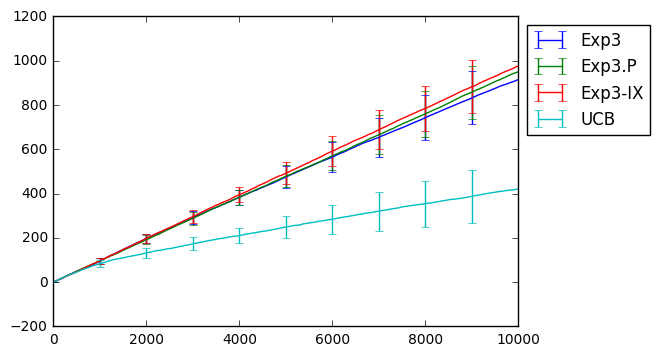

In [42]:
#cumulated rewards with std plot
T1 = 0
T2 = 10000
plt.errorbar(np.arange(T2 - T1), (best_cumsum - Rewards_cum[0])[T1:T2], Rewards_std[0], errorevery=1000, label="Exp3")
plt.errorbar(np.arange(T2 - T1), (best_cumsum - Rewards_cum[1])[T1:T2], Rewards_std[0], errorevery=1000, label="Exp3.P")
plt.errorbar(np.arange(T2 - T1), (best_cumsum - Rewards_cum[2])[T1:T2], Rewards_std[0], errorevery=1000, label="Exp3-IX")
plt.errorbar(np.arange(T2 - T1), (best_cumsum - Rewards_cum[3])[T1:T2], Rewards_std[0], errorevery=1000, label="UCB")

delta = 0.05
#0.95 bound for Exp3-IX and Exp3.P
if False:
    plt.plot([2 * np.sqrt(K * t * np.log(K)) + (np.sqrt(2 * K * t / (log(K))) + 1) * log(2 / delta) for t in range(1, T + 1)], label="0.95 Exp3-IX probability bound")
    plt.plot([5.15 * np.sqrt(t * K * np.log(K / delta)) for t in range(T)], label="Exp3.P 0.95 probability bound")
plt.legend(loc="upper left", bbox_to_anchor=(1., 1.))

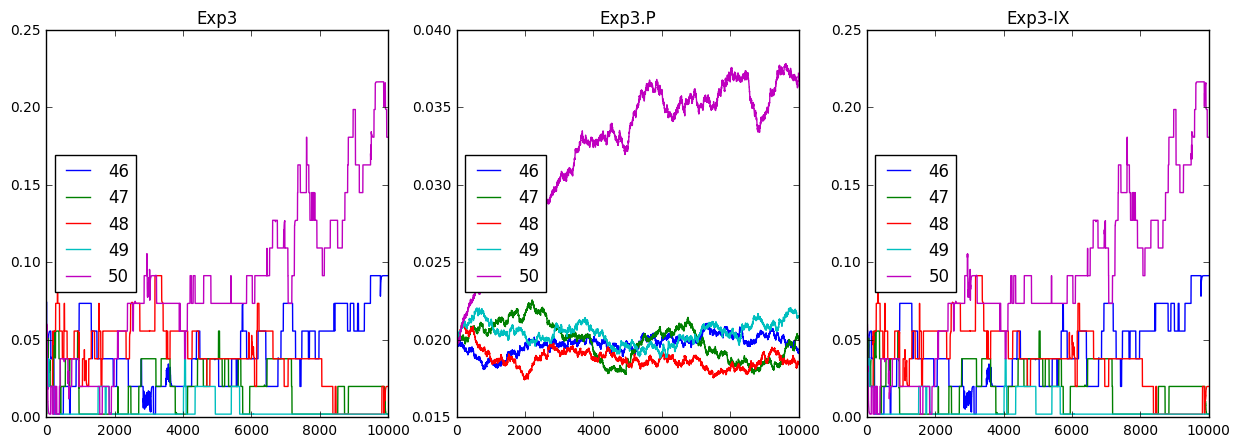

In [45]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)

plt.plot(Prob[0][:, 45:50])
plt.legend([i + 46 for i in range(10)], loc="center left")
plt.title("Exp3")

plt.subplot(1, 3, 2)

plt.plot(Prob[1][:, 45:50])
plt.legend([i + 46 for i in range(10)], loc="center left")
plt.title("Exp3.P")

plt.subplot(1, 3, 3)
plt.plot(Prob[0][:, 45:50])
plt.legend([i + 46 for i in range(10)], loc="center left")
plt.title("Exp3-IX")
